In [ ]:
#mount gdrive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#read csv file into a dataframe
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/ML_assignments/weatherHistory.csv')

df.head(10)
#df.dtypes

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [ ]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
# Converting to correct form of date
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], format = "%Y-%m-%d %H:%M:%S.%f %z") 
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00+02:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00+02:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00+02:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00+02:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00+02:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [ ]:
# Separating "Formatted Date" to 3 categorical features
df["year"] = df["Formatted Date"].apply(lambda x: x.year)
df["month"] = df["Formatted Date"].apply(lambda x: x.month)
df["day"] = df["Formatted Date"].apply(lambda x: x.day)

In [ ]:
# Dropping "Formatted Date"
df = df.drop(columns=['Formatted Date'])
df.head(10)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,year,month,day
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,4,1
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,4,1
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1
5,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.,2006,4,1
6,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.,2006,4,1
7,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.,2006,4,1
8,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.,2006,4,1
9,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.,2006,4,1


**Here I am trying to predict Temperature(C)**

In [ ]:
#find number of missing values in each column
df.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
year                          0
month                         0
day                           0
dtype: int64

In [ ]:
#drop missing values 
df = df.dropna(axis=0)

In [ ]:
# rechecking null values
df.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
year                        0
month                       0
day                         0
dtype: int64

**<h1>Drawing Box-Plots</h1>**

Box-Plots for non-caterorical features.

**Apparent Temperature (C) Box Plot**

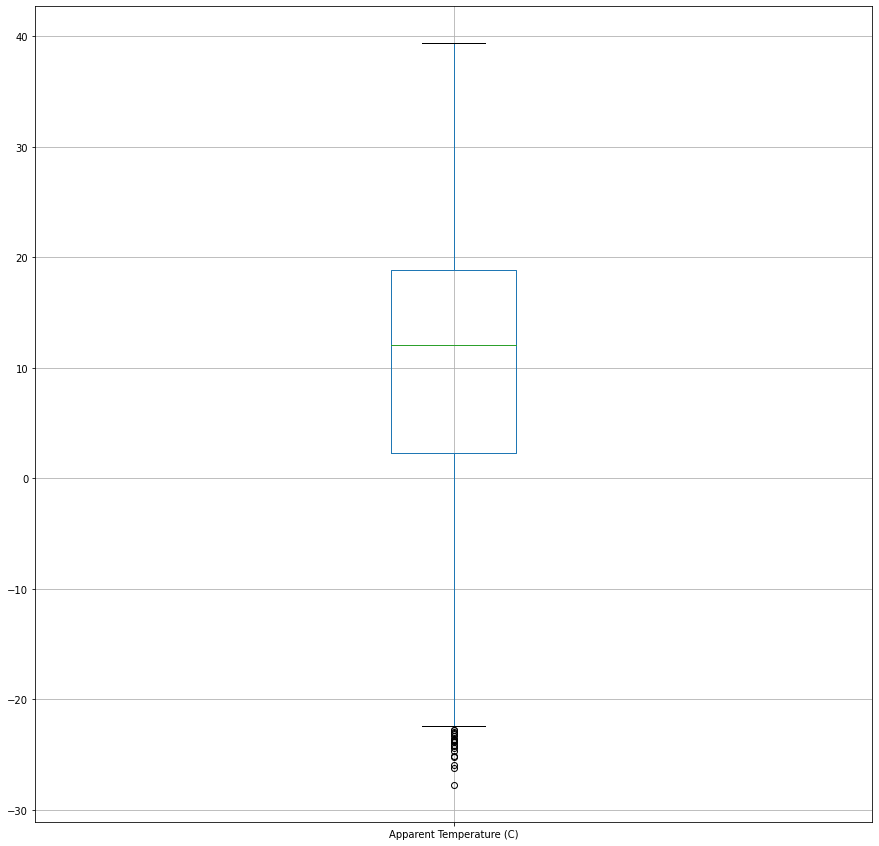

In [ ]:
df.boxplot(column=['Apparent Temperature (C)'], figsize=[15,15])

'Apparent Temperature (C)' feature does not have outliers,since there are many points below the minimum(not just 1 or 2 points).



**Humidity Box Plot**

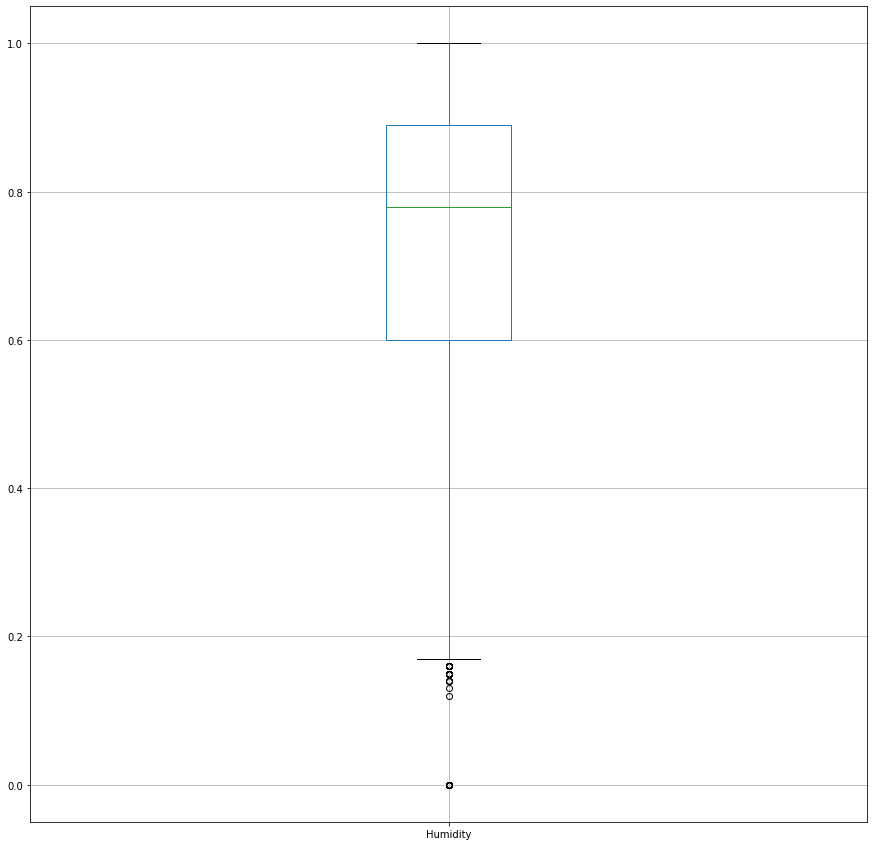

In [ ]:
df.boxplot(column=['Humidity'], figsize=[15,15])

'Humidity' feature does not have outliers,since there are 6 points below the minimum(not just 1 or 2 points).

**Wind Speed (km/h) Box Plot**

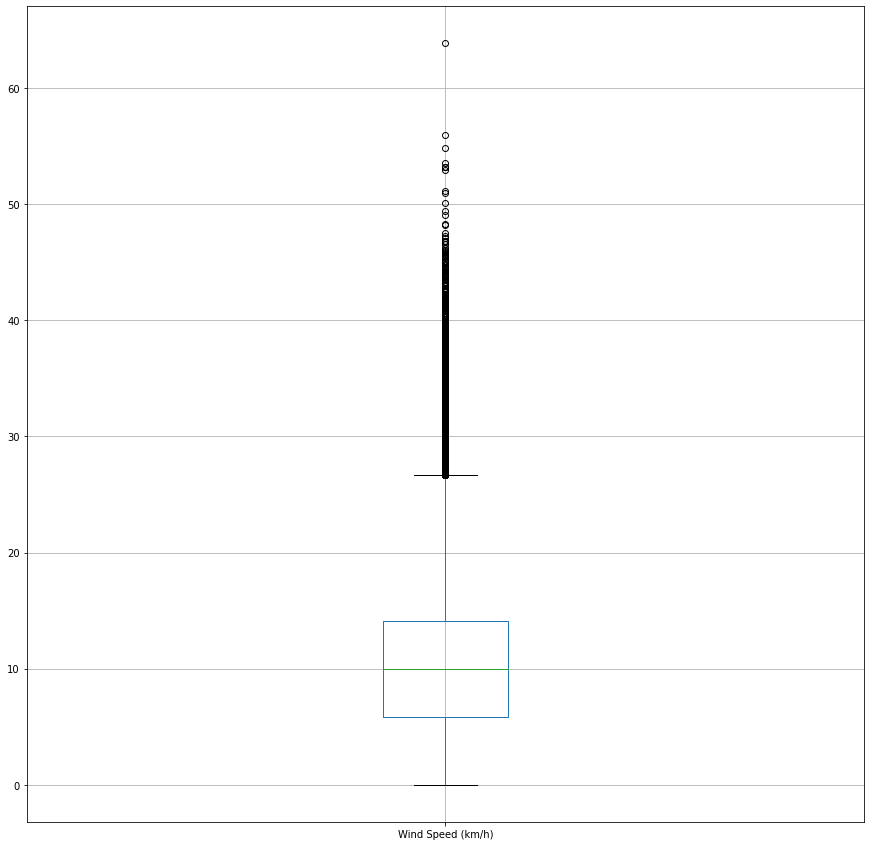

In [ ]:
df.boxplot(column=['Wind Speed (km/h)'], figsize=[15,15])

'Wind Speed (km/h)' feature does not have outliers,since there are too many points far away from the maximum(not just 1 or 2 points).

**Wind Bearing (degrees) Box Plot**

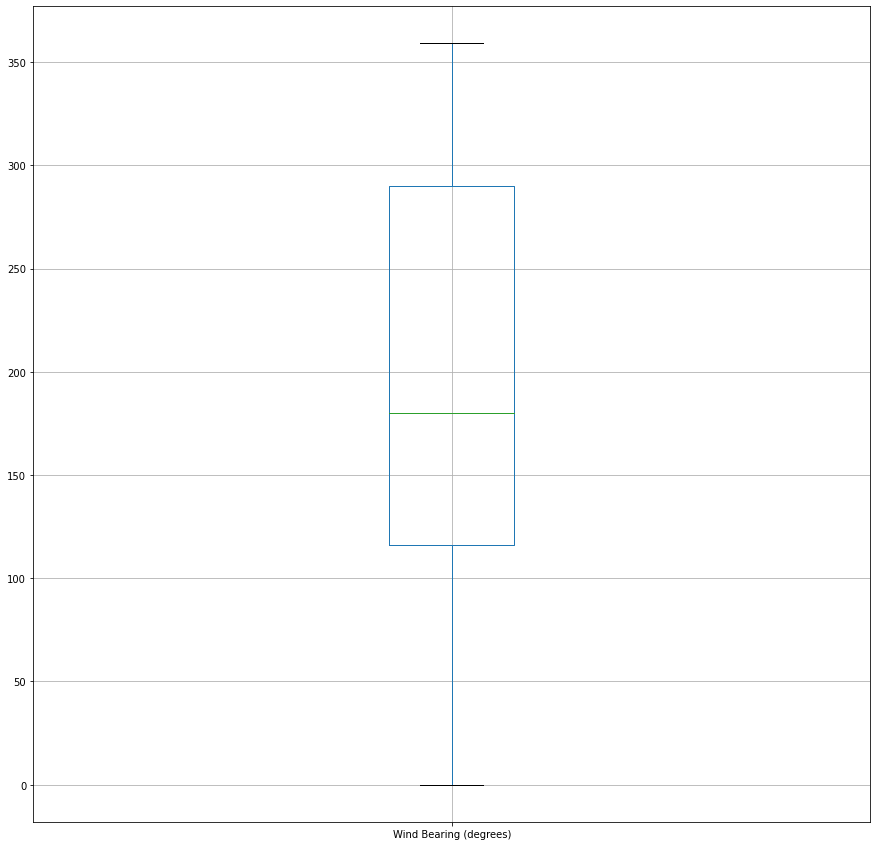

In [ ]:
df.boxplot(column=['Wind Bearing (degrees)'], figsize=[15,15])

'Wind Bearing (degrees)' feature does not have outliers. All points are within the range.

**Visibility (km) Box Plot**

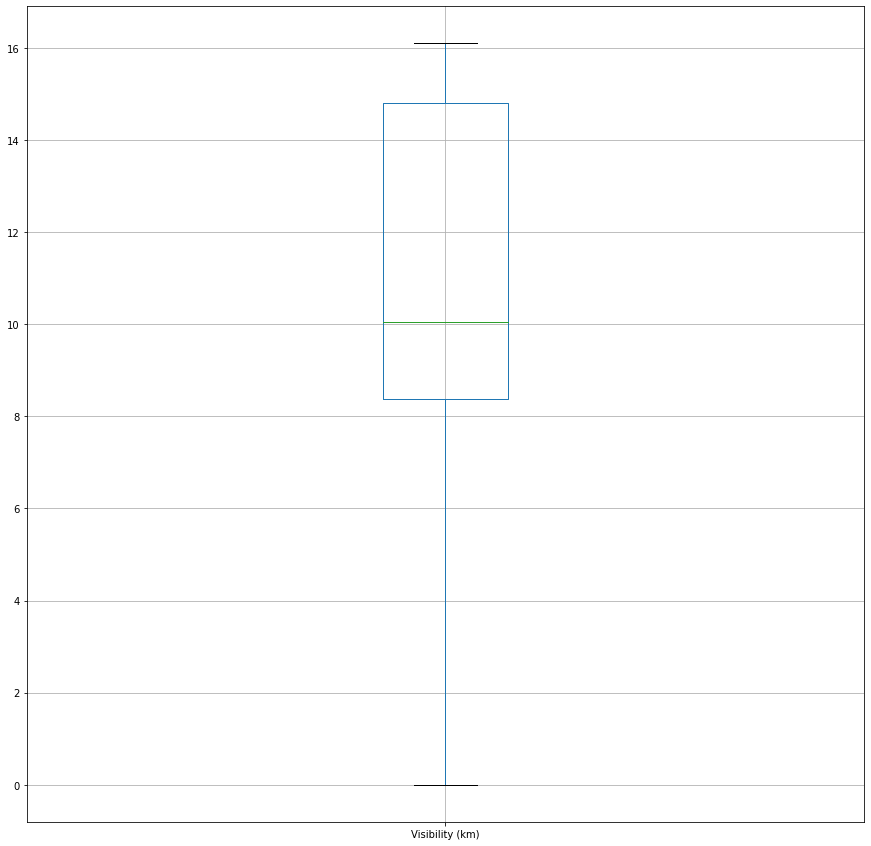

In [ ]:
df.boxplot(column=['Visibility (km)'], figsize=[15,15])

'Visibility (km)' feature does not have outliers. All points are within the range.

**Loud Cover Box Plot**

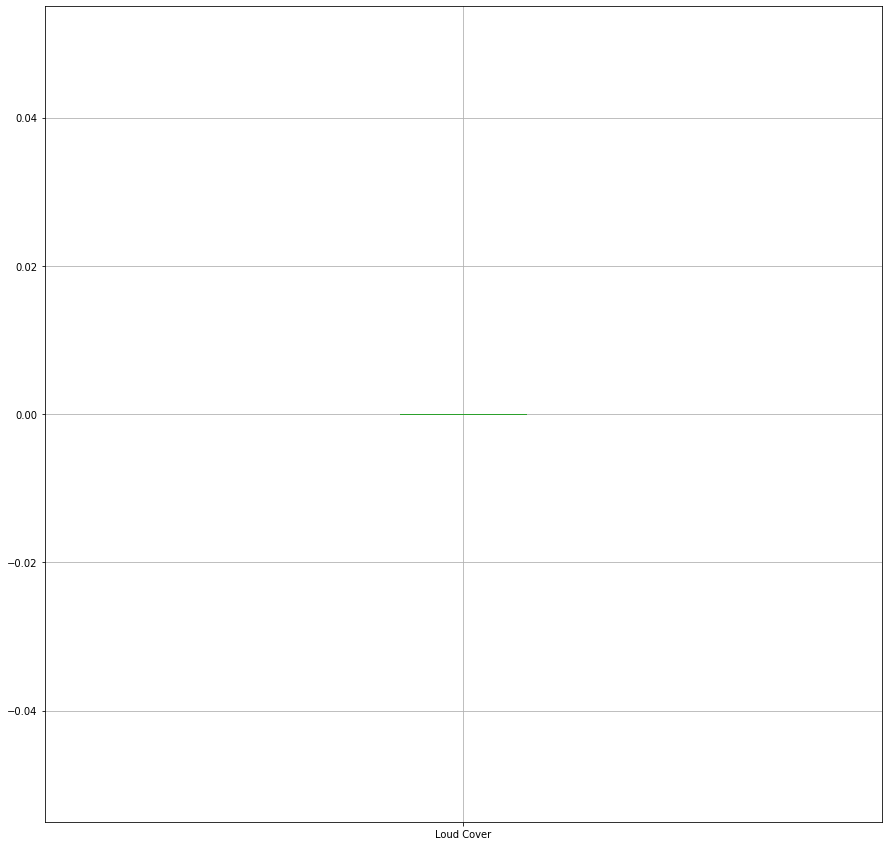

In [ ]:
df.boxplot(column=['Loud Cover'], figsize=[15,15])

'Loud Cover' feature does not have outliers. All points are 0.0.

**Pressure (millibars) Box Plot**

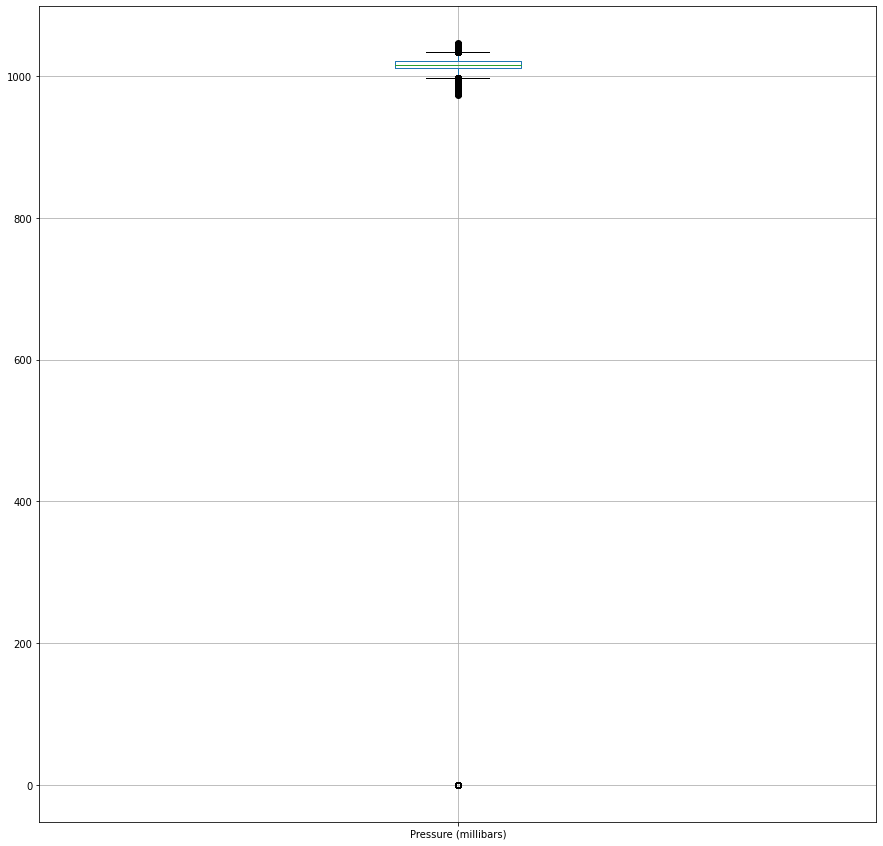

In [ ]:
df.boxplot(column=['Pressure (millibars)'], figsize=[15,15])

'Pressure (millibars)' feature does not have outliers, since there are too many points far away from the maximum and below the minimum (not just 1 or 2 points).

In [ ]:
# Drop column Loud Cover, since no variance in the column
df = df.drop(columns=['Loud Cover'])

**<h1>Drawing Q-Q Plots and Histograms</h1>**



For non-categorical features.

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
data = df

**Q-Q Plot and Histogram for Apparent Temperature (C)**

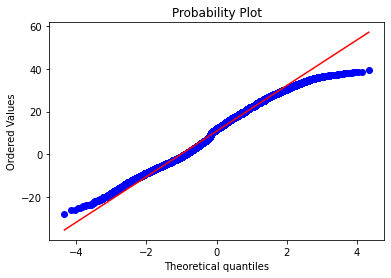

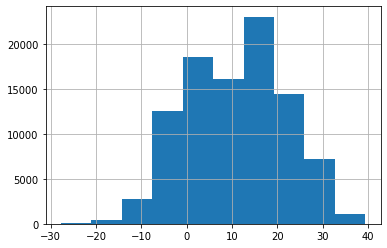

In [ ]:
# Q-Q Plot drawing
stats.probplot(data["Apparent Temperature (C)"],dist='norm',plot=plt)
plt.show()
# histogram drawing
data['Apparent Temperature (C)'].hist()

"Apparent Temperature (C)" feature has almost a normal distribution. No need of transformation.

**Q-Q Plot and Histogram for Humidity**

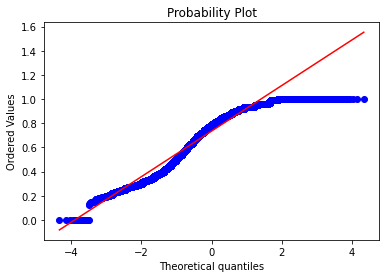

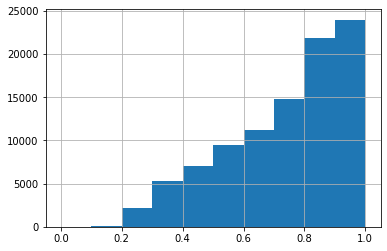

In [ ]:
# Q-Q Plot drawing
stats.probplot(data["Humidity"],dist='norm',plot=plt)
plt.show()
# histogram drawing
data['Humidity'].hist()

"Humidity" feature is left-skewed. Should apply transformation. 

**Q-Q Plot and Histogram for Wind Speed (km/h)**

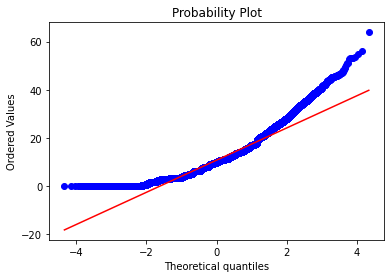

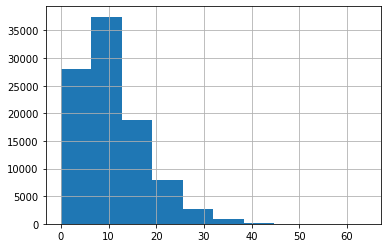

In [ ]:
# Q-Q Plot drawing
stats.probplot(data["Wind Speed (km/h)"],dist='norm',plot=plt)
plt.show()
# histogram drawing
data['Wind Speed (km/h)'].hist()

"Wind Speed (km/h)" feature is right-skewed. Should apply transformation.

**Q-Q Plot and Histogram for Wind Bearing (degrees)**

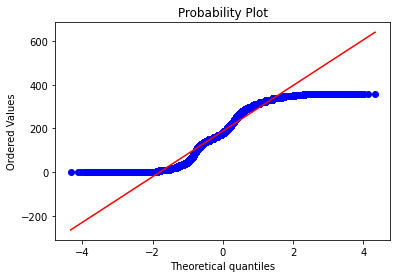

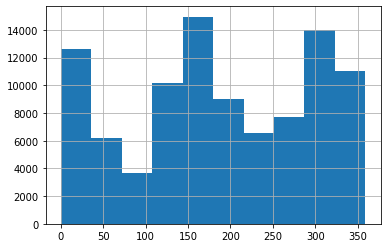

In [ ]:
# Q-Q Plot drawing
stats.probplot(data["Wind Bearing (degrees)"],dist='norm',plot=plt)
plt.show()
# histogram drawing
data['Wind Bearing (degrees)'].hist()

Can not identify skiwness in Wind Bearing (degrees). No need of transformation.

**Q-Q Plot and Histogram for Visibility (km)**

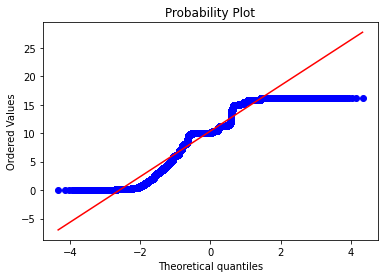

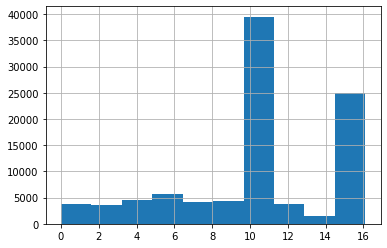

In [ ]:
# Q-Q Plot drawing
stats.probplot(data["Visibility (km)"],dist='norm',plot=plt)
plt.show()
# histogram drawing
data['Visibility (km)'].hist()

"Visibility (km)" feature is left-skewed. Should apply transformation.

**Q-Q Plot and Histogram for Pressure (millibars)**

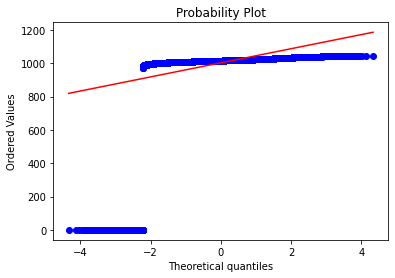

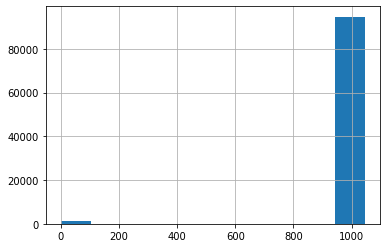

In [ ]:
# Q-Q Plot drawing
stats.probplot(data["Pressure (millibars)"],dist='norm',plot=plt)
plt.show()
# histogram drawing
data['Pressure (millibars)'].hist()

"Pressure (millibars)" is left-skewed. Should apply transformation.

**Logarithm Transformation for Wind Speed (km/h)**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer

# dropping all zeros before applying log transformation

df = df.replace(0,np.nan)


df = df.dropna()
df.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
year                        0
month                       0
day                         0
dtype: int64

In [ ]:
columns = ['Wind Speed (km/h)']
# log transformation
lt = FunctionTransformer(np.log, validate=True)
data_new = lt.transform(df[columns])

In [ ]:
# re-assigning transformed values 
df['Wind Speed (km/h)'] = data_new[:,0]

**Q-Q Plot and Histogram for Wind Speed (km/h) after transformation**

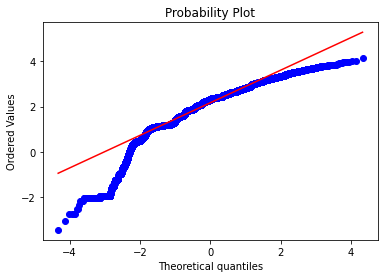

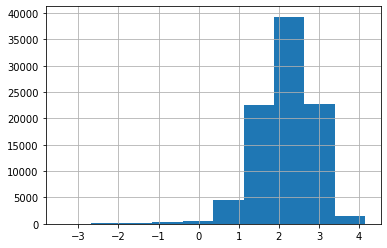

In [ ]:
# Q-Q Plot drawing
stats.probplot(df["Wind Speed (km/h)"],dist='norm',plot=plt)
plt.show()
# histogram drawing
df['Wind Speed (km/h)'].hist()

**Exponential Transformation for Humidity and Visibility (km)**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer

In [ ]:
columns = ['Humidity','Visibility (km)']
# exponential transformation
et = FunctionTransformer(np.exp, validate=True)
data_new = et.transform(df[columns])

In [ ]:
# re-assigning transformed values 
df['Humidity'] = data_new[:,0]
df['Visibility (km)'] = data_new[:,1]
#df.head(10)

**Q-Q Plot and Histogram for Humidity after transformation**

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

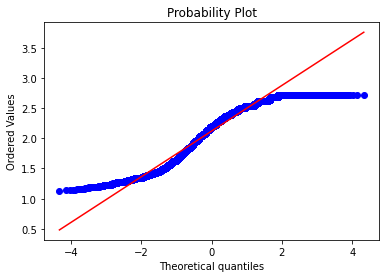

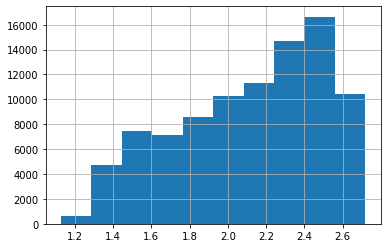

In [ ]:
# Q-Q Plot drawing
stats.probplot(df["Humidity"],dist='norm',plot=plt)
plt.show()
# histogram drawing
df['Humidity'].hist()

**Q-Q Plot and Histogram for Visisbility (km) after transformation**

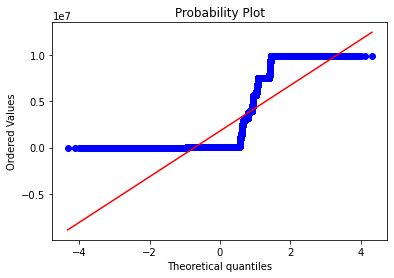

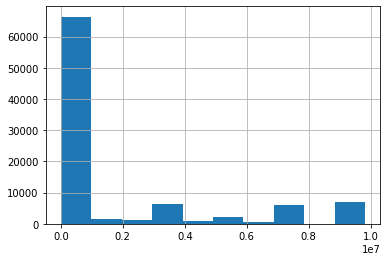

In [ ]:
# Q-Q Plot drawing
stats.probplot(df["Visibility (km)"],dist='norm',plot=plt)
plt.show()
# histogram drawing
df['Visibility (km)'].hist()

**Reciprocal transformation for Pressure(millibars)**

Can not apply np.exp, since it can not handle large values which leads to overflow error. So that used np.reciprocal instead of np.exp. Can use np.reciprocal, as all the 0 values have been dropped.

In [ ]:
columns = ['Pressure (millibars)']
# reciprocal transformation
et = FunctionTransformer(np.reciprocal, validate=True)
data_new = et.transform(df[columns])

In [ ]:
# re-assigning transformed values 
df['Pressure (millibars)'] = data_new[:,0]
df.head(10)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,year,month,day
0,Partly Cloudy,rain,9.472222,7.388889,2.435130,2.647571,251.0,7.469212e+06,0.000985,Partly cloudy throughout the day.,2006,4,1
1,Partly Cloudy,rain,9.355556,7.227778,2.363161,2.657781,259.0,7.469212e+06,0.000985,Partly cloudy throughout the day.,2006,4,1
2,Mostly Cloudy,rain,9.377778,9.377778,2.435130,1.368232,204.0,3.131116e+06,0.000984,Partly cloudy throughout the day.,2006,4,1
3,Partly Cloudy,rain,8.288889,5.944444,2.293319,2.646430,269.0,7.469212e+06,0.000984,Partly cloudy throughout the day.,2006,4,1
4,Mostly Cloudy,rain,8.755556,6.977778,2.293319,2.401942,259.0,7.469212e+06,0.000984,Partly cloudy throughout the day.,2006,4,1
5,Partly Cloudy,rain,9.222222,7.111111,2.339647,2.636103,258.0,3.131116e+06,0.000984,Partly cloudy throughout the day.,2006,4,1
6,Partly Cloudy,rain,7.733333,5.522222,2.585710,2.514854,259.0,2.163354e+04,0.000984,Partly cloudy throughout the day.,2006,4,1
7,Partly Cloudy,rain,8.772222,6.527778,2.435130,2.649849,260.0,2.163354e+04,0.000983,Partly cloudy throughout the day.,2006,4,1
8,Partly Cloudy,rain,10.822222,10.822222,2.270500,2.426421,259.0,2.163354e+04,0.000983,Partly cloudy throughout the day.,2006,4,1
9,Partly Cloudy,rain,13.772222,13.772222,2.054433,2.527791,279.0,2.163354e+04,0.000983,Partly cloudy throughout the day.,2006,4,1


**Q-Q Plot and Histgram for Pressure (millibars) after transformation**

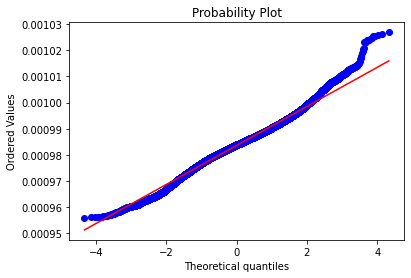

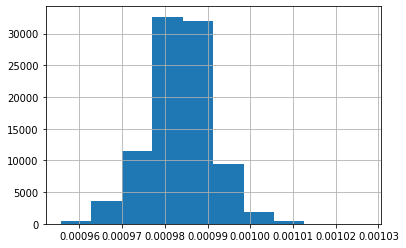

In [ ]:
# Q-Q Plot drawing
stats.probplot(df["Pressure (millibars)"],dist='norm',plot=plt)
plt.show()
# histogram drawing
df['Pressure (millibars)'].hist()

**<h1>Data Coding</h1>**

In [ ]:
df.dtypes

Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
year                          int64
month                         int64
day                           int64
dtype: object

Here I use "Ordinal Encoder", since it can be fitted on train data and used to transform test data. "cat.codes" will not do the same encoding for train and test data.

**Data coding for "Summary"**

In [ ]:
# changing data type of the feature as 'category'
df['Summary'] = df['Summary'].astype('category')
#df.dtypes

# generating labels and re-assigning to the same feature
df['Summary'] = df['Summary'].cat.codes
#df.head(10)

**Data Coding for "Precip Type"**

In [ ]:
# changing data type of the feature as 'category'
df['Precip Type'] = df['Precip Type'].astype('category')
#df.dtypes

# generating labels and re-assigning to the same feature
df['Precip Type'] = df['Precip Type'].cat.codes
#df.head(10)

**Data Coding for "Daily Summary"**

In [ ]:
# changing data type of the feature as 'category'
df['Daily Summary'] = df['Daily Summary'].astype('category')
#df.dtypes

# generating labels and re-assigning to the same feature
df['Daily Summary'] = df['Daily Summary'].cat.codes
df.head(10)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,year,month,day
0,19,0,9.472222,7.388889,2.435130,2.647571,251.0,7.469212e+06,0.000985,197,2006,4,1
1,19,0,9.355556,7.227778,2.363161,2.657781,259.0,7.469212e+06,0.000985,197,2006,4,1
2,17,0,9.377778,9.377778,2.435130,1.368232,204.0,3.131116e+06,0.000984,197,2006,4,1
3,19,0,8.288889,5.944444,2.293319,2.646430,269.0,7.469212e+06,0.000984,197,2006,4,1
4,17,0,8.755556,6.977778,2.293319,2.401942,259.0,7.469212e+06,0.000984,197,2006,4,1
5,19,0,9.222222,7.111111,2.339647,2.636103,258.0,3.131116e+06,0.000984,197,2006,4,1
6,19,0,7.733333,5.522222,2.585710,2.514854,259.0,2.163354e+04,0.000984,197,2006,4,1
7,19,0,8.772222,6.527778,2.435130,2.649849,260.0,2.163354e+04,0.000983,197,2006,4,1
8,19,0,10.822222,10.822222,2.270500,2.426421,259.0,2.163354e+04,0.000983,197,2006,4,1
9,19,0,13.772222,13.772222,2.054433,2.527791,279.0,2.163354e+04,0.000983,197,2006,4,1


In [ ]:
# checking missing values,to ensure no error occured
df.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
year                        0
month                       0
day                         0
dtype: int64

**<h1>Scaling Features</h1>**

For non-categorical features.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

column = ['Temperature (C)']

copy = df

# creating target as a separate dataframe
y_target = copy.drop(columns=['Summary','Precip Type','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)','Daily Summary','year','month','day'])

# creating a separate dataframe for features
df = df.drop(columns=['Temperature (C)'])

columns = ['Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']

# creating a separate dataframe for non-categorical features
df_num = pd.DataFrame(df[columns], columns=columns)

# creating scaler object
scaler = StandardScaler()

# scaler fitting on data
scaler.fit(df_num)

# transformation
d_new = scaler.transform(df_num)

# re-assigning transformed values
df['Apparent Temperature (C)'] = d_new[:,0]
df['Humidity'] = d_new[:,1]
df['Wind Speed (km/h)'] = d_new[:,2]
df['Wind Bearing (degrees)'] = d_new[:,3]
df['Visibility (km)'] = d_new[:,4]
df['Pressure (millibars)'] = d_new[:,5]


#df.head()
#y_target.head(10)

**<h1>Histograms of non-categorical features after scaling</h1>**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08959b50d0>,
      dtype=object)

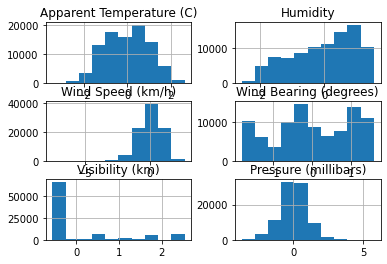

In [ ]:
column = ['Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']

# histogram drawing
df[column].hist()

**No descritization is applied, since the distribution of values is not within a huge range.**

In [ ]:
#df.head(10)

In [ ]:
# checking missing values,to ensure no error occured
df.isnull().sum()

Summary                     0
Precip Type                 0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
year                        0
month                       0
day                         0
dtype: int64

In [ ]:
df.shape

(91983, 12)

In [ ]:
y_target.head(10)

,Temperature (C)
0,9.472222
1,9.355556
2,9.377778
3,8.288889
4,8.755556
5,9.222222
6,7.733333
7,8.772222
8,10.822222
9,13.772222


In [ ]:
# joining target to features
joint = df.join(y_target)

# checking missing values,to ensure no error occured
joint.isnull().sum()

Summary                     0
Precip Type                 0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
year                        0
month                       0
day                         0
Temperature (C)             0
dtype: int64

**<h1>Feature reduction</h1>**

**<h2>Heat map</h2>**

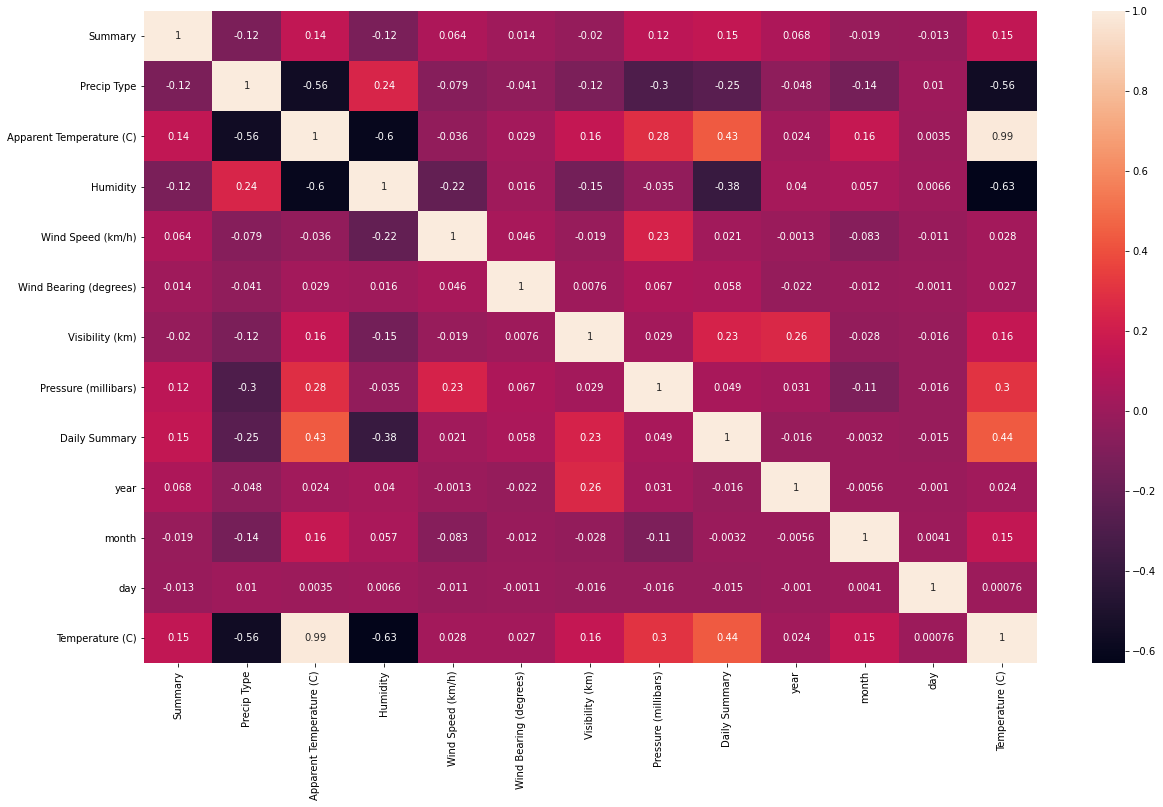

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# drawing heat map 
plt.figure(figsize=(20,12))
sns.heatmap(joint.corr(),annot=True)

In [ ]:
# checking features having significant correlation with target
threshold = 0.5

cor = joint.corr()
a = abs(cor['Temperature (C)'])

result = a[a>0.5]

result

Precip Type                 0.556980
Apparent Temperature (C)    0.992780
Humidity                    0.631709
Temperature (C)             1.000000
Name: Temperature (C), dtype: float64

In [ ]:
joint[['Humidity','Apparent Temperature (C)']].corr()

,Humidity,Apparent Temperature (C)
Humidity,1.000000,-0.603358
Apparent Temperature (C),-0.603358,1.000000


In [ ]:
joint[['Precip Type','Apparent Temperature (C)']].corr()

,Precip Type,Apparent Temperature (C)
Precip Type,1.00000,-0.55911
Apparent Temperature (C),-0.55911,1.00000


"Humidity" is removed and keep "Apparent Temperature (C)". 
"Precip Type" is removed and keep "Apparent Temperature (C)". 
So finally, remove "Precip Type" and "Humidity". Keep "Appaent Temperature (C)".

In [ ]:
# dropping "Precip Type" and "Humidity"
df = df.drop(columns=['Precip Type','Humidity'])

In [ ]:
df.head(10)

,Summary,Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,year,month,day
0,19,-0.333865,0.646907,0.564719,1.797096,0.197726,197,2006,4,1
1,19,-0.348916,0.660680,0.641175,1.797096,0.133141,197,2006,4,1
2,17,-0.148065,-1.078854,0.115544,0.429407,0.093131,197,2006,4,1
3,19,-0.468803,0.645368,0.736744,1.797096,0.032516,197,2006,4,1
4,17,-0.372271,0.315566,0.641175,1.797096,0.019626,197,2006,4,1
5,19,-0.359815,0.631437,0.631618,0.429407,0.000297,197,2006,4,1
6,19,-0.508247,0.467878,0.641175,-0.550933,-0.007433,197,2006,4,1
7,19,-0.414309,0.649980,0.650732,-0.550933,-0.022891,197,2006,4,1
8,19,-0.013127,0.348587,0.641175,-0.550933,-0.091119,197,2006,4,1
9,19,0.262459,0.485329,0.832313,-0.550933,-0.071816,197,2006,4,1


**<h2>SVD</h2>**

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
# creating svd object 
svd = TruncatedSVD(n_components=8)

# converting feature set to np array
df_arr = df.to_numpy()

# fitting and transformation
X_transformed = svd.fit_transform(df_arr)

# creating transformed feature dataframe
v = pd.DataFrame(X_transformed)

# converting target to np array
y = y_target.to_numpy()

#print(len(X_transformed))

v.head(10)

,0,1,2,3,4,5,6,7
0,2014.568522,-67.209207,-14.492262,-2.127752,2.414091,-0.198438,0.153064,0.636376
1,2014.568522,-67.209119,-14.492178,-2.125816,2.413441,-0.171688,0.093100,0.699756
2,2014.552509,-67.181930,-14.474477,-0.121907,2.435672,0.847006,0.318556,0.493413
3,2014.568522,-67.208195,-14.492111,-2.120419,2.416301,-0.069883,-0.014753,0.784121
4,2014.552509,-67.186841,-14.478354,-0.120300,2.495668,0.025559,0.206506,0.823294
5,2014.568522,-67.203260,-14.489901,-2.140188,2.395930,0.054138,-0.760553,0.261644
6,2014.568521,-67.198009,-14.488417,-2.148343,2.389716,0.273573,-1.363349,-0.002519
7,2014.568521,-67.198803,-14.488507,-2.152585,2.389167,0.153884,-1.408512,-0.056505
8,2014.568521,-67.201733,-14.487541,-2.152667,2.358774,0.214692,-1.115529,0.098055
9,2014.568521,-67.204141,-14.487434,-2.160781,2.349604,-0.017827,-1.142586,0.229882


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# splitting train and test data as np arrays
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LinearRegression

# creating linear model
linearModel1 = LinearRegression() 

# fitting model to train data
linearModel1.fit(X_train, y_train) 

# evaluating the Linear Regression model 
print(linearModel1.score(X_test, y_test)) 

0.604964445007595


**<h2>PCA</h2>**

In [ ]:
from sklearn.decomposition import PCA

# creating pca object
pca = PCA()

# converting feature set to np array
df_arr1 = df.to_numpy()

# transformation
df_pca = pca.fit_transform(df_arr1)

#converting target to np array
y1 = y_target.to_numpy()

# creating transformed feature dataframe
df_inter = pd.DataFrame(data = df_pca,columns = ['Summary','Apparent Temperature (C)','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)','Daily Summary','year','month','day'])

# creating target dataframe
y_df = pd.DataFrame(y1,columns=['Temperature (C)'])

# joining teatures and target
df_final = pd.concat([df_inter, y_df], axis = 1)

df_final.head(10)

,Summary,Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,year,month,day,Temperature (C)
0,-67.124017,-14.528506,-1.498957,2.372083,-5.022360,-0.221441,-0.238614,0.427463,2.064737,0.484068,9.472222
1,-67.123929,-14.528423,-1.496948,2.371427,-5.023412,-0.195332,-0.323960,0.455502,2.084808,0.448395,9.355556
2,-67.095713,-14.511171,0.500667,2.395519,-4.901466,0.798450,0.314765,0.792077,0.187572,0.763691,9.377778
3,-67.123006,-14.528359,-1.491416,2.374276,-5.025484,-0.094725,-0.468530,0.475645,2.125641,0.475360,8.288889
4,-67.100635,-14.514950,0.494412,2.456289,-4.787161,0.004311,-0.247849,0.643601,1.946377,0.503935,8.755556
5,-67.118059,-14.526251,-1.502635,2.353049,-5.150719,-0.009850,-0.726448,-0.038865,0.899794,0.282222,9.222222
6,-67.112801,-14.524843,-1.504555,2.346213,-5.242243,0.180763,-1.021049,-0.336480,0.014782,0.363453,7.733333
7,-67.113594,-14.524932,-1.508783,2.345660,-5.242440,0.060386,-1.048388,-0.414353,0.060730,0.226037,8.772222
8,-67.116519,-14.523964,-1.509119,2.315296,-5.238011,0.125434,-0.795856,-0.098531,-0.125811,-0.004256,10.822222
9,-67.118922,-14.523856,-1.517228,2.306122,-5.237812,-0.107356,-0.862043,0.023550,-0.147322,-0.243960,13.772222


In [ ]:
# variance created by each feature
pca.explained_variance_ratio_

array([9.62733645e-01, 2.36902121e-02, 5.46527647e-03, 3.64603062e-03,
       3.05409068e-03, 3.92156085e-04, 3.03638398e-04, 2.94530102e-04,
       2.57583623e-04, 1.62836584e-04])

In [ ]:
# considering the variances, drop features
df_final = df_final.drop(columns=['Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)','Daily Summary','year','month','day'])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df_final

# separating target dataframe
X = X.drop(columns=['Temperature (C)'])

y = df_final

# separating features
y = y.drop(columns=['Summary','Apparent Temperature (C)'])

# splitting train and test data
Xx_train, Xx_test, yy_train, yy_test = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LinearRegression
linearModel2 = LinearRegression() 
linearModel2.fit(Xx_train, yy_train) 

# Evaluating the Linear Regression model 
print(linearModel2.score(Xx_test, yy_test)) 

0.1885971454195211


**SVD approach is better, since easy to impliment and high accuracy.**